In [1]:
# %pip install datasets

In [2]:
from datasets  import load_dataset

In [3]:
emotions = load_dataset('emotion')

Using custom data configuration default
Reusing dataset emotion (/home/roark/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions['train']

In [6]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
len(train_ds)

16000

In [8]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [9]:
train_ds.column_names

['text', 'label']

In [10]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [11]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [12]:
# %pip install pandas

In [13]:
import pandas as pd

In [14]:
emotions.set_format(type='pandas')
df = emotions['train'][:]

In [15]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [16]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

In [17]:
df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [18]:
# %pip install matplotlib

In [19]:
import matplotlib.pyplot as plt

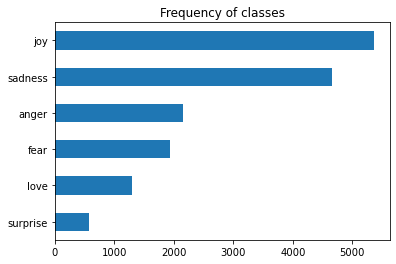

In [20]:
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of classes')
plt.show()

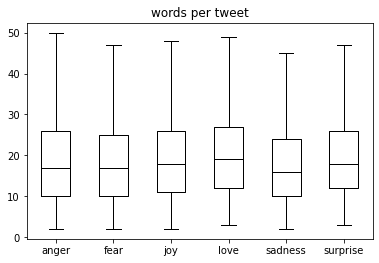

In [21]:
df['words per tweet'] = df['text'].str.split().apply(len)
df.boxplot('words per tweet', by='label_name', grid=False, showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [22]:
emotions.reset_format()

## Converting text to tokens

### Character tokenization

In [23]:
text = "Tokenizing a text is a core task of nlp."

In [24]:
tokenized_text = list(text)
tokenized_text

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 'a',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'n',
 'l',
 'p',
 '.']

In [25]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}

In [26]:
token2idx

{' ': 0,
 '.': 1,
 'T': 2,
 'a': 3,
 'c': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'i': 8,
 'k': 9,
 'l': 10,
 'n': 11,
 'o': 12,
 'p': 13,
 'r': 14,
 's': 15,
 't': 16,
 'x': 17,
 'z': 18}

In [27]:
input_ids = [token2idx[token] for token in tokenized_text]
input_ids

[2,
 12,
 9,
 5,
 11,
 8,
 18,
 8,
 11,
 7,
 0,
 3,
 0,
 16,
 5,
 17,
 16,
 0,
 8,
 15,
 0,
 3,
 0,
 4,
 12,
 14,
 5,
 0,
 16,
 3,
 15,
 9,
 0,
 12,
 6,
 0,
 11,
 10,
 13,
 1]

### one hot encoding

In [28]:
import torch

In [29]:
import torch.nn.functional as F

In [30]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings

tensor([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
one_hot_encodings.shape

torch.Size([40, 19])

### work Tokenization

In [32]:
tokenized_text = text.split()
tokenized_text

['Tokenizing', 'a', 'text', 'is', 'a', 'core', 'task', 'of', 'nlp.']

### Subword Tokenization

In [33]:
# %pip install transformers

In [34]:
from transformers import AutoTokenizer

In [35]:
model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [36]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 1037, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [37]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
tokens

['[CLS]',
 'token',
 '##izing',
 'a',
 'text',
 'is',
 'a',
 'core',
 'task',
 'of',
 'nl',
 '##p',
 '.',
 '[SEP]']

In [38]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] tokenizing a text is a core task of nlp. [SEP]'

In [39]:
tokenizer.vocab_size

30522

In [40]:
tokenizer.model_max_length

512

In [41]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## Tokenizing whole dataset

In [42]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [43]:
emotions.reset_format()

In [44]:
data = emotions['train'][:2]
data

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [45]:
tokenize(data)

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [46]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Loading cached processed dataset at /home/roark/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-c7fed2f70c41121b.arrow
Loading cached processed dataset at /home/roark/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-21d58b118b3c11ab.arrow
Loading cached processed dataset at /home/roark/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-153c0d223ff30f7c.arrow


In [47]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

## Training a Text Classifier

### Using feature extraction

In [48]:
from transformers import AutoModel

In [49]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [50]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### extracting last hidden states

In [51]:
text = 'this is test'
inputs = tokenizer(text, return_tensors='pt')

In [52]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [53]:
inputs['input_ids'].size()

torch.Size([1, 5])

In [54]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1]]))])

In [55]:
inputs = {k:v.to(device) for k,v in inputs.items()}

In [56]:
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1806, -0.2071,  0.0328,  ..., -0.1708,  0.0965,  0.4657],
         [-0.2480, -0.5684, -0.0858,  ..., -0.3988,  0.2793,  0.4190],
         [-0.1909, -0.3274,  0.1479,  ..., -0.2904,  0.1836,  0.7389],
         [ 0.2626, -0.6047, -0.1508,  ..., -0.2679,  0.0220, -0.1032],
         [ 0.9373, -0.0230, -0.4387,  ...,  0.1496, -0.5907, -0.2791]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [57]:
outputs.last_hidden_state.size()

torch.Size([1, 5, 768])

In [58]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [59]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {'hidden_state': last_hidden_state[:,0].cpu().numpy()}

In [60]:
emotions_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [61]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [62]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [63]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

### Creating a Feature Matrix

In [64]:
import numpy as np

In [65]:
X_train = np.array(emotions_hidden['train']['hidden_state'])
Y_train = np.array(emotions_hidden['train']['label'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
Y_valid = np.array(emotions_hidden['validation']['label'])


In [66]:
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

### Visualizing training data

In [67]:
# %pip install umap-learn

In [68]:
%load_ext autoreload
%autoreload 2

In [69]:
from umap import UMAP

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns=['X','Y'])
df_emb['label'] = Y_train
df_emb.head()

,X,Y,label
0,4.241577,6.891098,0
1,-2.872172,5.718032,0
2,5.213567,3.483632,3
3,-2.051764,3.435657,2
4,-3.147018,3.758933,3


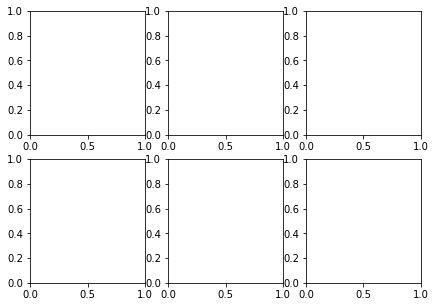

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))

In [73]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [74]:
axes = axes.flatten()
axes

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [75]:
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']

In [76]:
labels = emotions['train'].features['label'].names

In [81]:
%matplotlib inline

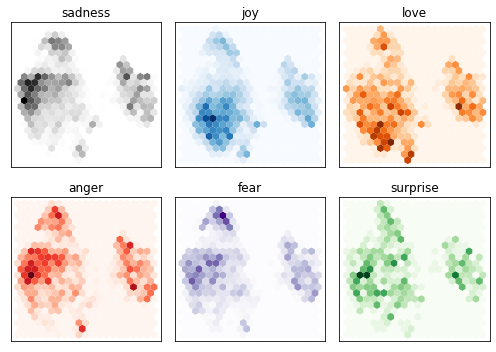

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f'label == {i}')
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap,
                  gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]),axes[i].set_yticks([])
plt.tight_layout()
plt.show()

### Training a classifier

In [85]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_valid, Y_valid)

0.633

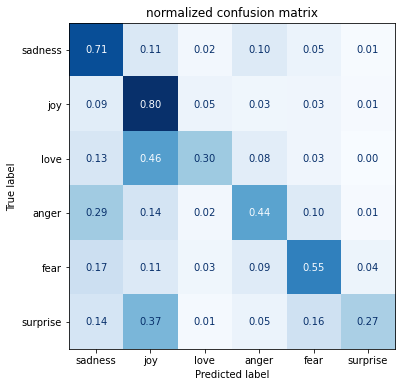

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.title('normalized confusion matrix')
    plt.show()
    
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, Y_valid, labels)

In [87]:
from transformers import AutoModelForSequenceClassification

In [88]:
num_labels = 6
model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, num_labels=num_labels)
        .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classi

In [89]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1':f1}

In [90]:
from transformers import Trainer, TrainingArguments

In [91]:
batch_size = 64
logging_steps = len(emotions_encoded['train'])//batch_size
model_name = f'{model_ckpt}-finetuned-emotion'

In [92]:
train_args = TrainingArguments(output_dir=model_name,
                              num_train_epochs=2,
                              learning_rate=2e-5,
                              per_device_train_batch_size=batch_size,
                              per_device_eval_batch_size=batch_size,
                              weight_decay=0.01,
                              evaluation_strategy='epoch',
                              disable_tqdm=False,
                              logging_steps=logging_steps,
                              push_to_hub=False,
                              log_level='error')

In [93]:
trainer = Trainer(model=model,
                 args=train_args,
                 compute_metrics=compute_metrics,
                 train_dataset=emotions_encoded['train'],
                 eval_dataset=emotions_encoded['validation'],
                 tokenizer=tokenizer)

In [94]:
trainer.train()

/home/roark/.local/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.819500,0.306198,0.906000,0.903284
2,0.242900,0.210425,0.925500,0.925598


TrainOutput(global_step=500, training_loss=0.5311627655029297, metrics={'train_runtime': 199.1202, 'train_samples_per_second': 160.707, 'train_steps_per_second': 2.511, 'total_flos': 720342861696000.0, 'train_loss': 0.5311627655029297, 'epoch': 2.0})

In [95]:
preds_output = trainer.predict(emotions_encoded['validation'])

In [96]:
preds_output.metrics

{'test_loss': 0.21042461693286896,
 'test_accuracy': 0.9255,
 'test_f1': 0.9255984789026159,
 'test_runtime': 3.3406,
 'test_samples_per_second': 598.695,
 'test_steps_per_second': 9.579}

In [97]:
y_preds = np.argmax(preds_output.predictions, axis=1)

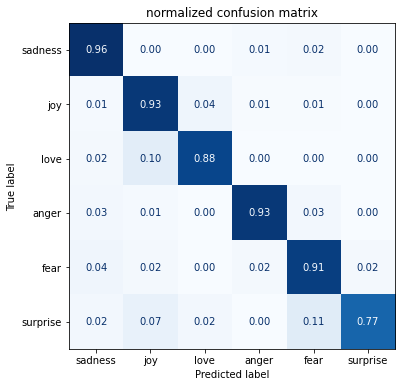

In [98]:
plot_confusion_matrix(y_preds, Y_valid, labels)

In [99]:
from torch.nn.functional import cross_entropy

In [106]:
def forward_pass_with_label(batch):
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch['label'].to(device), reduction='none')
    return {'loss': loss.cpu().numpy(), 'predicted_label':pred_label.cpu().numpy()}


In [107]:
emotions_encoded.set_format('torch', columns=['input_ids', 'label', 'attention_mask'])

In [108]:
emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_with_label,
                                                                   batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [110]:
emotions_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = df_test['predicted_label'].apply(label_int2str)

In [111]:
df_test.sort_values('loss', ascending=False).head(10)

,text,label,predicted_label,loss
1274,i am going to several holiday parties and i ca...,joy,sadness,5.440374
1963,i called myself pro life and voted for perry w...,joy,sadness,5.365319
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.296935
1801,i feel that he was being overshadowed by the s...,love,sadness,5.215636
318,i felt ashamed of these feelings and was scare...,fear,sadness,5.207798
882,i feel badly about reneging on my commitment t...,love,sadness,5.174869
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.027242
1111,im lazy my characters fall into categories of ...,joy,fear,4.627669
465,i would eventually go in to these stores but i...,joy,fear,4.183331
1950,i as representative of everything thats wrong ...,surprise,sadness,4.095824


In [113]:
df_test.sort_values('loss', ascending=True).head(10)

,text,label,predicted_label,loss
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.013767
1601,i feel so ungrateful when thinking saying thes...,sadness,sadness,0.013769
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.013991
133,i and feel quite ungrateful for it but i m loo...,sadness,sadness,0.014000
1310,i feel like an ungrateful asshole,sadness,sadness,0.014306
1502,i feel ungrateful for stupid shit like,sadness,sadness,0.014344
21,i feel try to tell me im ungrateful tell me im...,sadness,sadness,0.014381
69,i have no extra money im worried all of the ti...,sadness,sadness,0.014411
392,i remember feeling disheartened one day when w...,sadness,sadness,0.014476
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.014571
